<a href="https://colab.research.google.com/github/antonellafontanetto/Achivos_Extras/blob/main/Modelo_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
#Se utilizo la función usecols para extraer las features mas reelevantes del dataset
produccion = pd.read_csv('/content/produccion.zip', usecols=['anio','mes','idpozo','empresa','tipopozo','tipoestado','prod_gas','prod_pet','profundidad','areayacimiento','cuenca','provincia','sub_tipo_recurso','prod_agua','tipoextraccion','profundidad','areapermisoconcesion','coordenadax','coordenaday','proyecto','clasificacion','subclasificacion'])
produccion

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areapermisoconcesion,areayacimiento,cuenca,provincia,coordenadax,coordenaday,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
0,2018,1,132488,0.000000,171.937000,0.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.864960,-39.016722,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
1,2017,1,130021,0.000000,245.850000,16.680000,Plunger Lift,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ANTICLINAL CAMPAMENTO,ANTICLINAL CAMPAMENTO SUR,NEUQUINA,Neuquén,-69.733102,-39.024859,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
2,2018,1,132487,0.000000,514.696000,17.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,ESTACION FERNANDEZ ORO,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.837875,-39.019313,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
3,2015,1,137212,0.000000,422.110000,0.000000,Bombeo Mecánico,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,AL NORTE DE LA DORSAL,GUANACO,NEUQUINA,Neuquén,-69.255971,-38.860779,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
4,2018,1,132361,0.000000,217.103000,7.300000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,...,AL NORTE DE LA DORSAL,GUANACO,NEUQUINA,Neuquén,-69.231360,-38.869270,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345377,2024,12,3640,14.049906,17.378994,72.385001,Bombeo Mecánico,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,EL CARACOL,NEUQUINA,Neuquén,-68.452390,-37.954170,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE
345378,2023,12,164872,0.000000,0.000000,0.000000,NaN,NaN,NaN,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.099940,-38.174340,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345379,2024,12,164374,60.960855,602.844409,63.852351,Surgencia Natural,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.106619,-38.178494,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345380,2024,12,164873,0.000000,0.000000,0.000000,Surgencia Natural,Parado Transitoriamente,Gasífero,Petrolera Aconcagua Energia S.A.,...,ENTRE LOMAS,CHARCO BAYO,NEUQUINA,Rio Negro,-68.129670,-38.149710,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT


In [7]:
#Filtro por cada dataset solo los registros para YPF S.A., para la cuenca Neuquina y a partir del año 2021 inclusive
prod_ypf = produccion[(produccion['empresa'] == 'YPF S.A.')&(produccion['cuenca'] == 'NEUQUINA')&(produccion['anio']>2020)]

prod_ypf

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,...,areapermisoconcesion,areayacimiento,cuenca,provincia,coordenadax,coordenaday,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
7721,2022,1,145736,361.88,56.60,0.00,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA,NEUQUINA,Neuquén,-68.602972,-38.347494,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7723,2022,1,153001,0.27,47.84,41.61,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,RINCON DEL MANGRULLO,RINCON DEL MANGRULLO,NEUQUINA,Neuquén,-69.342559,-38.565581,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7725,2022,1,146996,0.00,12.09,2.83,Surgencia Natural,Extracción Efectiva,Gasífero,YPF S.A.,...,LOMA LA LATA - SIERRA BARROSA,CUPEN MAHUIDA,NEUQUINA,Neuquén,-68.933269,-38.749028,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7727,2022,1,145718,50.43,24.68,99.83,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.869480,-38.330964,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7729,2022,1,145714,0.00,0.00,0.00,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.867956,-38.327995,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [8]:
#Con rename se logró renombrar las columnas que tenían nombres abreviados o poco legibles
prod_ypf=prod_ypf.rename(columns={'anio':'Año','mes':'Mes','idpozo':'ID pozo','prod_pet':'Produccion de Petroleo','prod_gas':'Produccion de Gas','prod_agua':'Produccion de agua','tipoextraccion':'Tipo de extraccion','tipoestado':'Tipo de estado','tipopozo':'Tipo de pozo','empresa':'Empresa','profundidad':'Profundidad','areapermisoconcesion':'Area de permiso de concesion','cuenca':'Cuenca','provincia':'Provincia','proyecto':'Proyecto','clasificacion':'Clasificacion','subclasificacion':'Subclasificacion','sub_tipo_recurso':'Subtipo de recurso'})
prod_ypf

,Año,Mes,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,...,Area de permiso de concesion,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
7721,2022,1,145736,361.88,56.60,0.00,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA,NEUQUINA,Neuquén,-68.602972,-38.347494,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7723,2022,1,153001,0.27,47.84,41.61,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,...,RINCON DEL MANGRULLO,RINCON DEL MANGRULLO,NEUQUINA,Neuquén,-69.342559,-38.565581,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7725,2022,1,146996,0.00,12.09,2.83,Surgencia Natural,Extracción Efectiva,Gasífero,YPF S.A.,...,LOMA LA LATA - SIERRA BARROSA,CUPEN MAHUIDA,NEUQUINA,Neuquén,-68.933269,-38.749028,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
7727,2022,1,145718,50.43,24.68,99.83,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.869480,-38.330964,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
7729,2022,1,145714,0.00,0.00,0.00,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,...,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.867956,-38.327995,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,12,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,12,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,12,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,...,AGUADA DEL CHAÑAR,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,12,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,...,LAS TACANAS,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [11]:
# prompt: descargar el dataset prod_ypf en zip

from google.colab import files
prod_ypf.to_csv('prod_ypf.zip', index=False, compression='zip')
files.download('prod_ypf.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Clustering con K-Means

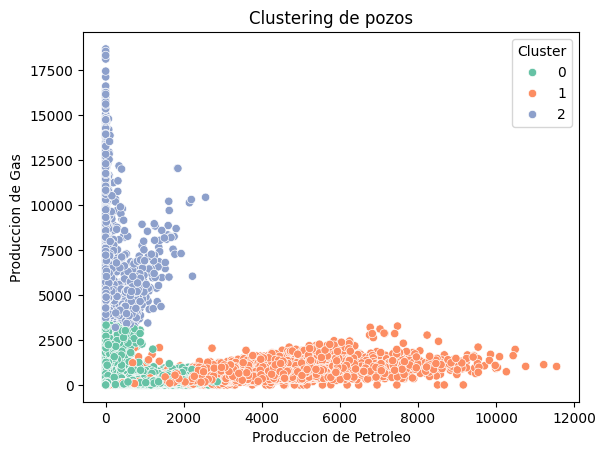

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV
df = pd.read_csv("/content/prod_ypf.zip")  # Agregale ".csv" si hiciera falta

# Seleccionar variables numéricas
X = df[['Produccion de Petroleo', 'Produccion de Gas', 'Produccion de agua']].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar
sns.scatterplot(data=df, x='Produccion de Petroleo', y='Produccion de Gas', hue='Cluster', palette='Set2')
plt.title('Clustering de pozos')
plt.show()


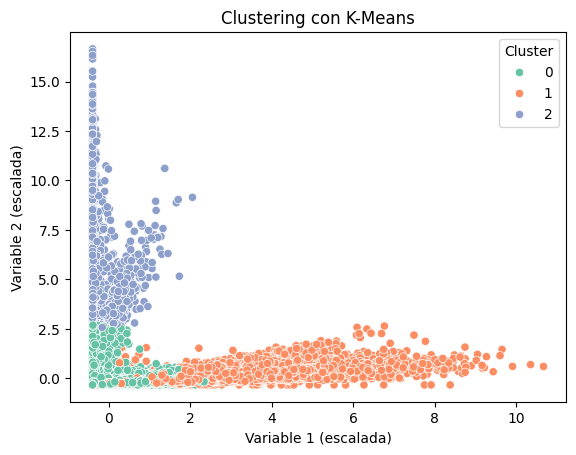

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, palette='Set2')
plt.title('Clustering con K-Means')
plt.xlabel('Variable 1 (escalada)')
plt.ylabel('Variable 2 (escalada)')
plt.legend(title='Cluster')
plt.show()


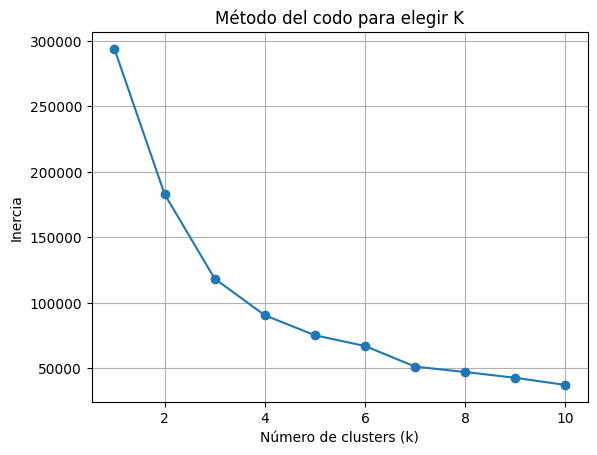

In [19]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para elegir K')
plt.grid(True)
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.8013242554376979


### Reducción de la dimensionalidad

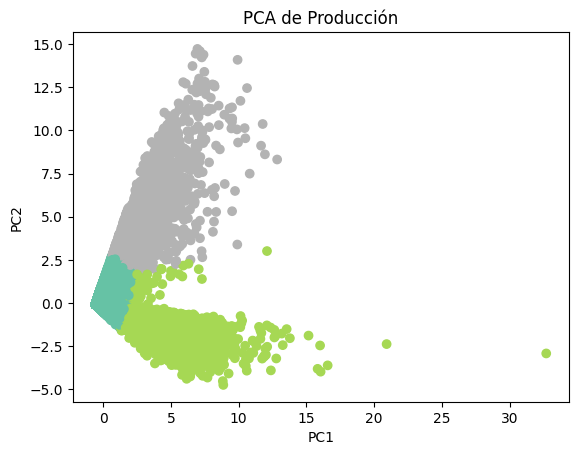

In [14]:
from sklearn.decomposition import PCA

# Usar mismo X_scaled
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA de Producción')
plt.show()


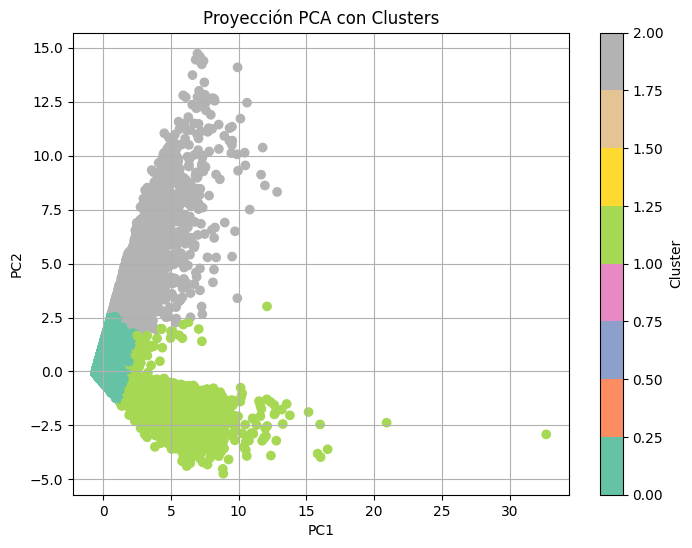

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA con Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [16]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())



Varianza explicada por cada componente: [0.53193482 0.31650756]
Varianza total explicada: 0.8484423878696746


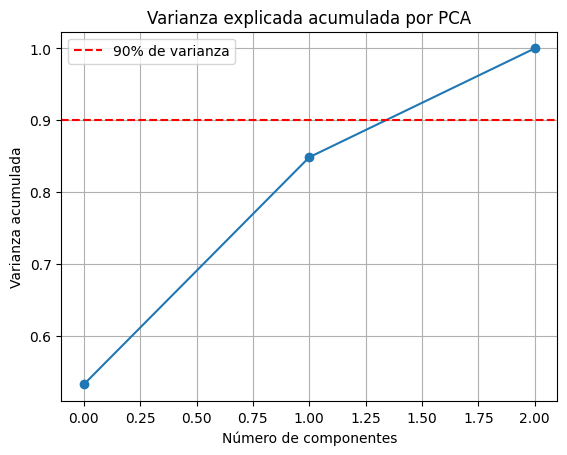

In [21]:
import numpy as np

pca_full = PCA().fit(X_scaled)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.grid(True)
plt.axhline(0.9, color='r', linestyle='--', label='90% de varianza')
plt.legend()
plt.show()


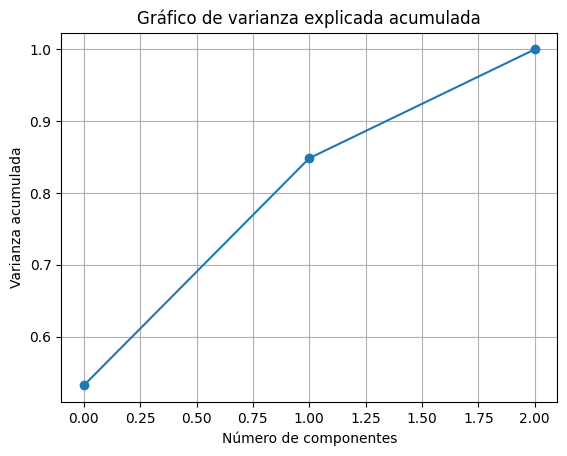

In [17]:
import numpy as np

pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Gráfico de varianza explicada acumulada')
plt.grid(True)
plt.show()
